# Success in modern baseball, through the statistics of the 2023 Atlanta Braves

There is an idea amongst members of the baseball community that "new baseball," i.e. what it takes to win games in the MLB in the 21st century, is all about speed, power, and the performance of flashy young players.

In this notbook, we will dive into some of the team hitting statistics from the winningest MLB team in the 2023 regular season, America's team, the Atlanta Braves.

# Data Preparation

In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

https://www.baseball-reference.com/leagues/majors/2023-standard-batting.shtml

https://www.baseball-reference.com/leagues/MLB-standings.shtml#all_expanded_standings_overall

In [2]:
#input from baseballreference.com in csv text format
hitting_data_text = '''Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
Arizona Diamondbacks,54,27.4,4.60,162,6124,5436,746,1359,274,44,166,706,166,26,540,1247,.250,.322,.408,.730,98,2219,121,58,36,50,11,1091
Atlanta Braves,53,27.9,5.85,162,6249,5597,947,1543,293,23,307,916,132,27,538,1289,.276,.344,.501,.845,124,2803,128,67,2,43,20,1062
Baltimore Orioles,50,27.3,4.98,162,6123,5495,807,1399,309,28,183,780,114,24,512,1370,.255,.321,.421,.742,107,2313,114,45,21,47,14,1041
Boston Red Sox,56,28.6,4.77,162,6174,5562,772,1437,339,19,182,734,112,26,486,1372,.258,.324,.424,.748,100,2360,118,71,11,35,15,1117
Chicago Cubs,48,28.4,5.06,162,6220,5504,819,1399,269,30,196,786,140,34,570,1391,.254,.330,.421,.751,100,2316,95,77,15,52,11,1127
Chicago White Sox,56,27.8,3.96,162,5980,5501,641,1308,264,13,171,617,86,22,377,1424,.238,.291,.384,.675,83,2111,122,52,16,29,19,1009
Cincinnati Reds,65,26.8,4.83,162,6195,5499,783,1371,268,37,198,747,190,48,556,1500,.249,.327,.420,.746,99,2307,101,92,19,29,8,1107
Cleveland Guardians,50,26.6,4.09,162,6096,5513,662,1379,294,29,124,622,151,36,471,1142,.250,.313,.381,.695,94,2103,108,55,13,44,40,1121
Colorado Rockies,57,28.1,4.45,162,6055,5496,721,1368,305,31,163,685,76,25,447,1543,.249,.310,.405,.715,83,2224,124,59,11,41,8,1038
Detroit Tigers,51,27.4,4.08,162,6080,5478,661,1293,245,29,165,635,85,23,508,1473,.236,.305,.382,.687,87,2091,107,49,13,31,10,1103
Houston Astros,41,28.8,5.10,162,6253,5567,827,1441,280,22,222,799,107,32,550,1241,.259,.331,.437,.768,111,2431,124,72,14,40,17,1134
Kansas City Royals,58,26.3,4.17,162,5985,5428,676,1325,258,43,163,651,163,47,411,1396,.244,.303,.398,.700,91,2158,96,71,14,58,12,1009
Los Angeles Angels,66,28.6,4.56,162,6145,5489,739,1346,248,26,231,708,72,31,518,1524,.245,.317,.426,.743,100,2339,117,79,8,46,27,1102
Los Angeles Dodgers,58,30.9,5.59,162,6333,5524,906,1422,303,20,249,877,105,25,644,1359,.257,.340,.455,.795,113,2512,98,85,5,69,29,1163
Miami Marlins,52,29.4,4.12,162,6049,5503,668,1427,259,23,166,635,86,21,430,1288,.259,.317,.405,.722,94,2230,159,50,22,38,23,1099
Milwaukee Brewers,58,27.7,4.49,162,6084,5386,728,1291,257,16,165,696,129,28,591,1412,.240,.319,.385,.705,93,2075,144,58,7,39,15,1075
Minnesota Twins,48,28.6,4.80,162,6219,5489,778,1335,264,24,233,745,86,18,594,1654,.243,.326,.427,.753,106,2346,119,92,12,32,13,1138
New York Mets,59,28.9,4.43,162,6056,5363,717,1275,220,21,215,692,118,15,525,1331,.238,.316,.407,.723,98,2182,105,107,19,38,11,1082
New York Yankees,54,28.5,4.15,162,5973,5323,673,1207,221,15,219,650,100,30,557,1427,.227,.304,.397,.701,91,2115,119,47,9,36,18,1007
Oakland Athletics,62,27.1,3.61,162,5966,5311,585,1187,225,21,171,563,149,31,498,1496,.223,.298,.370,.669,91,1967,125,85,28,36,12,1043
Philadelphia Phillies,44,28.4,4.91,162,6207,5541,796,1417,291,29,220,771,141,26,539,1481,.256,.327,.438,.765,108,2426,110,69,13,42,22,1123
Pittsburgh Pirates,58,27.3,4.27,162,6089,5406,692,1293,287,31,159,662,117,41,556,1464,.239,.315,.392,.707,92,2119,92,58,25,43,9,1111
San Diego Padres,56,28.4,4.64,162,6180,5401,752,1316,273,14,205,719,137,32,653,1311,.244,.329,.413,.742,106,2232,134,57,22,44,16,1144
Seattle Mariners,56,27.8,4.68,162,6201,5500,758,1332,283,12,210,728,118,30,548,1603,.242,.321,.413,.734,106,2269,95,111,4,37,14,1144
San Francisco Giants,52,28.4,4.16,162,6095,5412,674,1271,256,13,174,651,57,16,544,1492,.235,.312,.383,.695,92,2075,116,81,17,39,19,1130
St. Louis Cardinals,52,27.5,4.44,162,6204,5510,719,1376,264,12,209,697,101,29,570,1326,.250,.326,.416,.742,101,2291,122,70,13,37,17,1183
Tampa Bay Rays,58,26.8,5.31,162,6164,5511,860,1432,282,24,230,827,160,41,514,1420,.260,.331,.445,.776,114,2452,109,95,6,38,7,1047
Texas Rangers,48,28.3,5.44,162,6306,5595,881,1470,326,18,233,845,79,19,599,1416,.263,.337,.452,.790,113,2531,103,53,10,47,17,1164
Toronto Blue Jays,46,28.8,4.60,162,6220,5562,746,1423,292,19,188,705,99,34,550,1303,.256,.329,.417,.745,106,2317,129,69,4,32,14,1170
Washington Nationals,48,26.8,4.32,162,6085,5522,700,1401,279,26,151,665,127,29,423,1149,.254,.314,.396,.709,95,2185,112,78,20,38,6,1082
League Average,49,28.0,4.62,162,6137,5481,748,1361,274,24,196,717,117,29,527,1395,.248,.320,.414,.734,100,2270,116,70,14,41,16,1099
,1457,28.0,4.62,4860,184110,164424,22434,40843,8228,712,5868,21514,3503,866,15819,41844,.248,.320,.414,.734,100,68099,3466,2112,429,1230,474,32966'''

record_data_text = '''Rk,Tm,W,L,W-L%,Strk,R,RA,Rdiff,SOS,SRS,pythWL,Luck,vEast,vCent,vWest,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,last10,last20,last30
1,Atlanta Braves,104,58,.642,L 1,5.8,4.4,1.4,-0.1,1.4,101-61,3,35-17,22-9,21-12,26-20,52-29,52-29,8-3,23-18,81-49,23-9,55-33,49-25,7-3,11-9,17-13
2,Baltimore Orioles,101,61,.623,L 1,5.0,4.2,0.8,0.0,0.8,94-68,7,32-20,22-10,21-11,26-20,49-32,52-29,11-6,30-16,65-44,36-17,51-39,50-22,6-4,11-9,18-12
3,Los Angeles Dodgers,100,62,.617,W 1,5.6,4.3,1.3,-0.1,1.2,100-62,0,17-14,19-14,34-18,30-16,53-28,47-34,6-6,16-15,74-39,26-23,52-36,48-26,6-4,13-7,17-13
4,Tampa Bay Rays,99,63,.611,W 2,5.3,4.1,1.2,0.0,1.2,100-62,-1,31-21,23-9,18-14,27-19,53-28,46-35,7-5,22-25,75-52,24-11,48-44,51-19,6-4,13-7,19-11
5,Milwaukee Brewers,92,70,.568,W 1,4.5,4.0,0.5,0.0,0.5,90-72,2,18-14,33-19,13-19,28-18,49-32,43-38,10-5,29-18,70-44,22-26,51-38,41-32,6-4,13-7,18-12
6,Houston Astros,90,72,.556,W 4,5.1,4.3,0.8,-0.1,0.7,93-69,-3,16-17,14-17,32-20,28-18,39-42,51-30,1-8,20-21,62-51,28-21,42-43,48-29,6-4,10-10,16-14
7,Philadelphia Phillies,90,72,.556,W 1,4.9,4.4,0.5,0.0,0.5,89-73,1,25-27,19-12,18-15,28-18,49-32,41-40,10-7,29-24,60-51,30-21,47-43,43-29,7-3,12-8,16-14
8,Texas Rangers,90,72,.556,L 1,5.4,4.4,1.0,-0.1,0.9,96-66,-6,20-12,19-13,29-23,22-24,50-31,40-41,2-8,14-22,62-56,28-16,42-45,48-27,6-4,12-8,15-15
9,Toronto Blue Jays,89,73,.549,L 2,4.6,4.1,0.5,0.1,0.5,89-73,0,21-31,22-10,16-16,30-16,43-38,46-35,10-9,25-20,69-58,20-15,43-50,46-23,4-6,10-10,17-13
10,Seattle Mariners,88,74,.543,W 1,4.7,4.1,0.6,-0.1,0.6,91-71,-3,13-18,20-13,33-19,22-24,45-36,43-38,6-14,25-26,66-55,22-19,38-48,50-26,4-6,9-11,13-17
11,Minnesota Twins,87,75,.537,L 1,4.8,4.1,0.7,-0.2,0.6,93-69,-6,13-19,29-23,20-12,25-21,47-34,40-41,12-8,19-27,66-58,21-17,37-36,50-39,7-3,12-8,18-12
12,Miami Marlins,84,77,.522,L 1,4.1,4.5,-0.3,0.1,-0.3,75-86,9,26-25,18-15,14-17,26-20,46-35,38-42,7-3,33-13,64-59,20-18,38-50,46-27,5-4,11-8,18-11
13,Arizona Diamondbacks,84,78,.519,L 4,4.6,4.7,-0.1,0.0,-0.1,80-82,4,14-18,20-12,29-23,21-25,43-38,41-40,5-4,21-21,56-57,28-21,40-50,44-28,4-6,10-10,15-15
14,Chicago Cubs,83,79,.512,L 1,5.1,4.5,0.6,-0.1,0.5,90-72,-7,11-20,30-22,17-16,25-21,45-36,38-43,3-6,21-24,54-57,29-22,38-51,45-28,4-6,7-13,13-17
15,San Diego Padres,82,80,.506,W 5,4.6,4.0,0.6,0.0,0.6,92-70,-10,16-16,11-21,27-25,28-18,44-37,38-43,2-12,9-23,54-61,28-19,40-51,42-29,8-2,15-5,20-10
16,Cincinnati Reds,82,80,.506,L 2,4.8,5.1,-0.2,0.0,-0.2,77-85,5,15-17,21-31,18-14,28-18,38-43,44-37,10-5,34-29,59-55,23-25,41-47,41-33,3-7,9-11,14-16
17,New York Yankees,82,80,.506,L 1,4.2,4.3,-0.2,0.1,0.0,78-84,4,22-30,18-14,19-13,23-23,42-39,40-41,6-9,17-23,67-67,15-13,47-46,35-34,6-4,12-8,18-12
18,San Francisco Giants,79,83,.488,L 1,4.2,4.4,-0.3,0.0,-0.3,76-86,3,13-18,20-13,26-26,20-26,45-36,34-47,11-5,25-19,51-63,28-20,46-55,33-28,3-7,7-13,10-20
19,Detroit Tigers,78,84,.481,W 2,4.1,4.6,-0.5,-0.1,-0.6,73-89,5,7-25,35-17,15-17,21-25,37-44,41-40,10-8,21-20,62-62,16-22,31-54,47-30,7-3,13-7,19-11
20,Boston Red Sox,78,84,.481,W 1,4.8,4.8,0.0,0.1,0.1,81-81,-3,24-28,19-13,15-17,20-26,39-42,39-42,4-6,18-25,54-66,24-18,51-55,27-29,3-7,6-14,9-21
21,Cleveland Guardians,76,86,.469,L 2,4.1,4.3,-0.2,-0.1,-0.3,77-85,-1,16-16,23-29,17-15,20-26,42-39,34-47,11-9,27-31,52-51,24-35,41-45,35-41,4-6,8-12,14-16
22,Pittsburgh Pirates,76,86,.469,W 1,4.3,4.9,-0.6,0.0,-0.6,71-91,5,16-17,25-27,16-15,19-27,39-42,37-44,3-9,22-17,50-58,26-28,40-62,36-24,5-5,10-10,17-13
23,New York Mets,74,87,.460,L 1,4.4,4.5,-0.1,0.0,0.0,79-82,-5,24-27,13-19,18-14,19-27,42-38,32-49,7-3,24-28,57-52,17-35,44-57,30-30,3-6,9-10,14-15
24,Los Angeles Angels,73,89,.451,W 1,4.6,5.1,-0.6,0.0,-0.5,73-89,0,14-18,18-14,22-30,19-27,38-43,35-46,7-8,22-21,57-64,16-25,35-63,38-26,4-6,8-12,10-20
25,St. Louis Cardinals,71,91,.438,W 2,4.4,5.1,-0.7,0.0,-0.6,71-91,0,14-18,21-31,13-19,23-23,35-46,36-45,6-6,17-26,54-66,17-25,45-56,26-35,4-6,8-12,15-15
26,Washington Nationals,71,91,.438,W 1,4.3,5.2,-0.9,0.1,-0.8,67-95,4,19-33,14-19,15-16,23-23,34-47,37-44,6-2,28-21,47-60,24-31,39-63,32-28,4-6,7-13,10-20
27,Chicago White Sox,61,101,.377,L 3,4.0,5.2,-1.2,0.0,-1.3,61-101,0,11-20,23-29,12-21,15-31,31-50,30-51,5-11,19-30,47-77,14-24,26-59,35-42,3-7,6-14,9-21
28,Colorado Rockies,59,103,.364,W 1,4.5,5.9,-1.5,0.1,-1.3,60-102,-1,14-20,13-17,14-38,18-28,37-44,22-59,6-4,23-24,37-74,22-29,31-72,28-31,3-7,8-12,10-20
29,Kansas City Royals,56,106,.346,W 1,4.2,5.3,-1.1,0.0,-1.2,64-98,-8,9-24,20-32,11-20,16-30,33-48,23-58,3-4,21-20,42-79,14-27,25-60,31-46,6-4,12-8,15-15
30,Oakland Athletics,50,112,.309,L 1,3.6,5.7,-2.1,0.1,-2.0,49-113,1,8-24,14-18,14-38,14-32,26-55,24-57,6-8,20-27,31-85,19-27,22-76,28-36,4-6,6-14,12-18
,Average,80,80,.500,,4.6,4.6,,,,81-80,,17-20,20-18,19-19,23-23,42-38,38-42,6-6,22-22,58-59,22-21,40-50,40-30,4-5,9-10,14-15'''

In [3]:
#reading Textual csv into a working df

# Use StringIO to simulate file objects
hit_data_file = StringIO(hitting_data_text)
r_data_file = StringIO(record_data_text)

# Read the data into DataFrames
hit_df = pd.read_csv(hit_data_file)
r_df = pd.read_csv(r_data_file)
hit_df.head();

In [4]:
#Join all input data for comparative analysis
data = pd.merge(r_df, hit_df, on='Tm', how='inner')
data.shape;

In [5]:
#remove irrelevant data 
remove = ['W-L%', 'L', 'R_x', 'SOS', 'vEast', 'vCent', 'vWest', 'Inter',
         'last10','last20','last30', 'CS', 'G', 'Rk', 'Home', 'Road', 'R_y',
         'TB', 'OPS+', 'HBP', 'GDP', 'pythWL', 'Strk', 'RA', 'SRS', 'Luck',
         'Rdiff']
data = data.drop(columns=remove)
#data.info()

In [6]:
#print(data.head(2))

# Compare Trends of Various stats vs. Wins

To begin our exploration, let's take a look at what offensive team stats trend most strongly with team success, measured in number of season wins, overall. We do this by calculating correlation coefficients between teams' Wins and each offensive metric

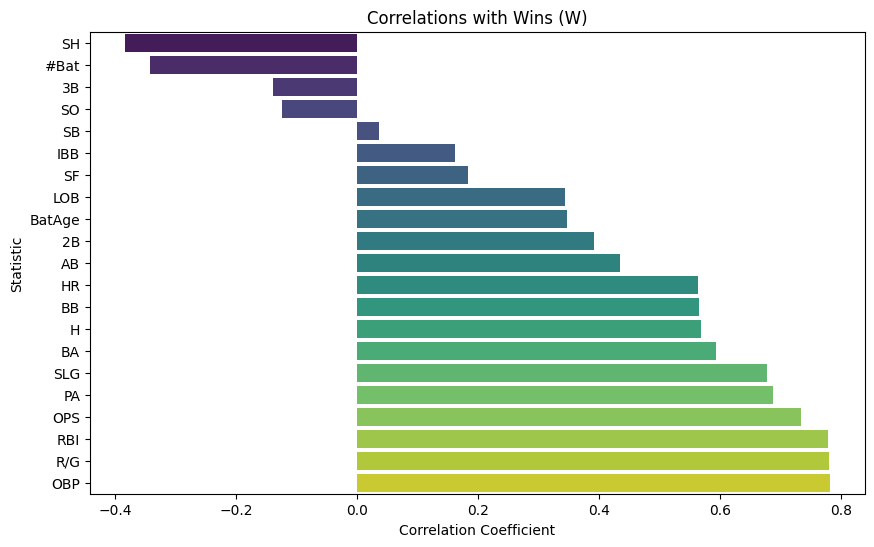

In [7]:
# extract only numeric columns to be compatible with .corr method
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_columns]

# Calculate correlations between wins ('W') and other features
correlations = numeric_data.corr()['W'].drop('W')
correlations = correlations.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlations with Wins (W)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Statistic')
plt.show()

First, let's acknowledge some of the trends that should not surprise most people familiar with the game of baseball:
- Team on base percentage, runs per game, and RBIs correlate strongly with team success
- Home runs, batting average, and hits trend with a high (almost 0.6) correlation coefficient
- Team strikeouts trend negatively with number of wins

Now, I'd like to draw attention to some more surprising stats, that may not be so intuitive for most fans:
- Number of sacrifice bunts trended negatively versus number of wins, meaning teams with fewer successful sacrifices on average actually won more games than teams with more sacrifices. This is interesting as a sacrifice implies that a run was scored by your team on that play
- Number of triples trended weakly negatively with wins. This is also a curious outcome because triples are nearly always very positive for a team.



# Analalyze the winningest team, The Braves

If you are interested, as so many people are, in "how can one construct the best baseball team possible?", then doesn't it make sense to understand the performance and approach of the best team or teams? As a case study, let's look into the offensive production of the 2023 Atlanta Braves, who won the most regular season games in the MLB.

Below is a visual that exemplifies how dominant the Braves hitters were in 2023. For each of the below Bar Graphs, the Braves offense lead the entire league in that statistical category:

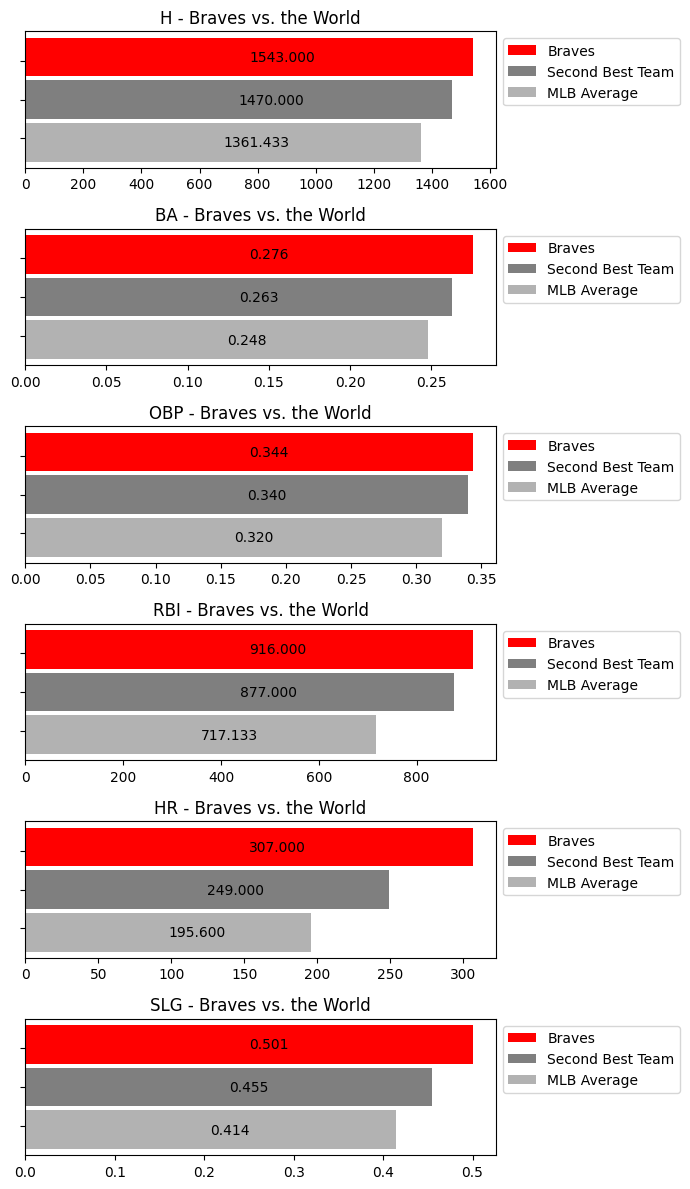

In [8]:
# Select the relevant columns
bar_columns = ['H', 'BA', 'OBP', 'RBI', 'HR', 'SLG']

# Create subplots
fig, axes = plt.subplots(len(bar_columns), figsize=(7, 2 * len(bar_columns)), sharex=False)

for i, column in enumerate(bar_columns):
    ax = axes[i]
    
    # Calculate values for the top team, second-best team, and the average
    top_team_value = numeric_data[column].iloc[0]
    average_value = numeric_data[column].mean()

    # Find the second-best team dynamically
    sorted_data = numeric_data[column].sort_values(ascending=False)
    second_best_team_value = sorted_data.iloc[1]

    # Create grouped bars
    bar_height= 0.1
    bar_spread= 0.11
    index = np.arange(1)

    bar1 = ax.barh(index + bar_spread, [top_team_value], bar_height, label='Braves', color='r')
    bar2 = ax.barh(index, [second_best_team_value], bar_height, label='Second Best Team', color='k', alpha=0.5)
    bar3 = ax.barh(index - bar_spread, [average_value], bar_height, label='MLB Average', color='k', alpha=0.3)
    ax.set_yticklabels([])
    
    # Annotate the bars with their true values
    for b in bar1 + bar2 + bar3:
        ax.text(b.get_width()/2, b.get_y() + b.get_height()/2, f'{b.get_width():.3f}', ha='left', va='center')

    
    ax.set_title(f'{column} - Braves vs. the World')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


And now, below, we break down and visualize what types of hits contributed most to the braves league-leading slugging percentage. 

Note: slugging percentage (SLG) is a composite of homeruns, triples, doubles, and singles.

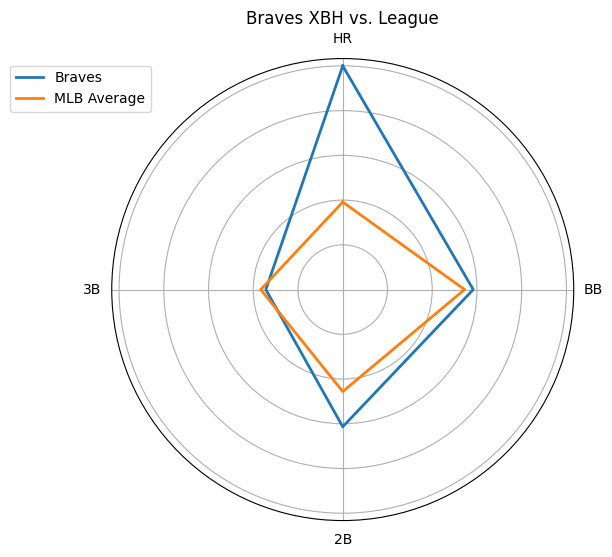

In [9]:
bar_columns = ['HR', 'BB', '2B', '3B']

# Calculate the mean values for the selected columns
mean_values = numeric_data[bar_columns].mean()

# Create a spider plot
plt.figure(figsize=(6, 6))

# Number of variables (columns)
num_vars = len(bar_columns)

# Create a list of angles for each variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the plot by adding the first angle at the end
angles += angles[:1]

# Create a subplot with polar projection
ax = plt.subplot(111, polar=True)

# Set the clockwise direction for the plot
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the axis labels for each variable
ax.set_xticks(angles[:-1])
ax.set_xticklabels(bar_columns)
ax.set_yticklabels([])



# Normalize the values to a common scale (0 to 1)
normalized_values = {}
for column in bar_columns:
    max_value = max(data[column])
    min_value = min(data[column])
    normalized_values[column] = [(x - min_value) / (max_value - min_value) for x in data[column]]

# Plot the first entry (index 0) and the average
values_top_team = [normalized_values[column][0] for column in bar_columns]
values_average = [np.mean(normalized_values[column]) for column in bar_columns]

values_top_team += [values_top_team[0]]  # Close the polygon for the top team
values_average += [values_average[0]]  # Close the polygon for the average

# Plot the top team
ax.plot(angles, values_top_team, linewidth=2, linestyle='solid', label='Top Team')

# Plot the average
ax.plot(angles, values_average, linewidth=2, linestyle='solid', label='Average')




# Set the title and legend
plt.title('Braves XBH vs. League')
plt.legend(['Braves', 'MLB Average'], loc='upper right', bbox_to_anchor=(0.1, 1))

# Display the plot
plt.show()

The dominant slugging percantage didn't hurt from the Braves' above-average ability to hit doubles, but it's clear that homeruns (HR) were prevalent.

# Conclusion

You can see that the Braves offense had overall success across many metrics this year, but what truly seperated them? Power hitting. Speed is good, defense is good, and batting for a high average is good, but hitting homeruns is the X-factor that seperates the great teams from the good.

"Small-ball" plays like sacrifice bunts have long been thought to be the secret sauce when it comes to winning baseball games, but trends show that small-ball ideology may be dying in the era of probability and statistics beginning to drive the sports world.

If you want to construct a winning baseball roster, do everything you can to draft, acquire, and develop players that consistently hit for power. 